In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%maplotlib inline

UsageError: Line magic function `%maplotlib` not found.


In [2]:
import torch.nn as nn

In [4]:
X = torch.linspace(1,50,50).reshape(-1,1)
print(X)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])


In [5]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e)

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])


In [6]:
y = 2*X + 1 + e
y.shape

torch.Size([50, 1])

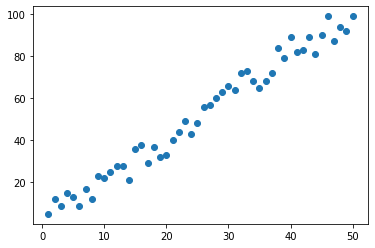

In [7]:
plt.scatter(X.numpy(), y.numpy())

In [8]:
torch.manual_seed(59)
model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [9]:
class Model(nn.Module):

    def __init__(self, in_features, out_features):
        super().__init__()

        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [10]:
#Instatiate the model 
torch.manual_seed(59)

model = Model(1, 1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [11]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [12]:
#Trying to test the above equation by entering our own value
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [13]:
x1 = np.linspace(0.0, 50.0, 50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [14]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1
print(y1)

[0.9637     1.07176122 1.17982245 1.28788367 1.3959449  1.50400612
 1.61206735 1.72012857 1.8281898  1.93625102 2.04431224 2.15237347
 2.26043469 2.36849592 2.47655714 2.58461837 2.69267959 2.80074082
 2.90880204 3.01686327 3.12492449 3.23298571 3.34104694 3.44910816
 3.55716939 3.66523061 3.77329184 3.88135306 3.98941429 4.09747551
 4.20553673 4.31359796 4.42165918 4.52972041 4.63778163 4.74584286
 4.85390408 4.96196531 5.07002653 5.17808776 5.28614898 5.3942102
 5.50227143 5.61033265 5.71839388 5.8264551  5.93451633 6.04257755
 6.15063878 6.2587    ]


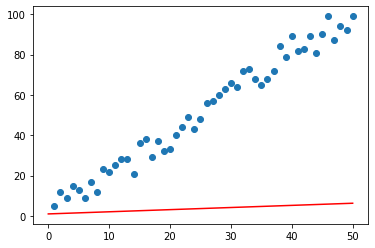

In [15]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1, 'r')

In [17]:
#utlising the loss function to improve our model
criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

#Training the model
#Choosing the epoch
epochs  = 50
losses = []

for i in range(epochs):
    i += 1

    #Predicting on the forward pass
    y_pred = model.forward(x)

    #Calculate the loss (ERROR)
    loss = criterion(y_pred, y)

    #Record that error
    losses.append(loss)

    print(f"epoch {i} loss:{loss.item()}  weight:{model.linear.weight.item()} bias:{model.linear.bias.item()}")

    #Resetting the gradients to avoid accumulation of gradients
    optimizer.zero_grad()

    #Backpropagation
    loss.backward()

    #Updating the hyperparameters
    optimizer.step()


epoch 1 loss:3336.060302734375  weight:0.30927515029907227 bias:1.0654445886611938
epoch 2 loss:3285.679443359375  weight:0.510539174079895 bias:1.1660765409469604
epoch 3 loss:3236.301513671875  weight:0.7097905278205872 bias:1.265702247619629
epoch 4 loss:3187.905517578125  weight:0.9070494174957275 bias:1.3643317222595215
epoch 5 loss:3140.47314453125  weight:1.1023356914520264 bias:1.461974859237671
epoch 6 loss:3093.984375  weight:1.2956690788269043 bias:1.5586415529251099
epoch 7 loss:3048.4208984375  weight:1.4870691299438477 bias:1.6543415784835815
epoch 8 loss:3003.76416015625  weight:1.6765551567077637 bias:1.7490845918655396
epoch 9 loss:2959.995849609375  weight:1.86414635181427 bias:1.8428802490234375
epoch 10 loss:2917.0986328125  weight:2.0498616695404053 bias:1.9357378482818604
epoch 11 loss:2875.055419921875  weight:2.233719825744629 bias:2.0276670455932617
epoch 12 loss:2833.848388671875  weight:2.4157395362854004 bias:2.1186769008636475
epoch 13 loss:2793.46166992187

/usr/local/lib/python3.9/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([50, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [31]:
np_losses = [x.detach().numpy() for x in losses]

Text(0.5, 0, 'Epoch')

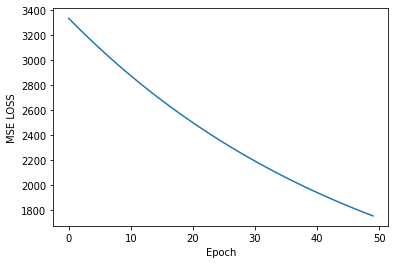

In [32]:
plt.plot(range(epochs), np_losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch')

In [34]:
#Utilizing the finalised weight and bias
x = np.linspace(0.0, 50.0, 50)

current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x + current_bias

In [35]:
print(x, predicted_y, sep="\n")

[ 0.          1.02040816  2.04081633  3.06122449  4.08163265  5.10204082
  6.12244898  7.14285714  8.16326531  9.18367347 10.20408163 11.2244898
 12.24489796 13.26530612 14.28571429 15.30612245 16.32653061 17.34693878
 18.36734694 19.3877551  20.40816327 21.42857143 22.44897959 23.46938776
 24.48979592 25.51020408 26.53061224 27.55102041 28.57142857 29.59183673
 30.6122449  31.63265306 32.65306122 33.67346939 34.69387755 35.71428571
 36.73469388 37.75510204 38.7755102  39.79591837 40.81632653 41.83673469
 42.85714286 43.87755102 44.89795918 45.91836735 46.93877551 47.95918367
 48.97959184 50.        ]
[  5.04034758  13.46798308  21.89561858  30.32325409  38.75088959
  47.1785251   55.6061606   64.03379611  72.46143161  80.88906711
  89.31670262  97.74433812 106.17197363 114.59960913 123.02724464
 131.45488014 139.88251564 148.31015115 156.73778665 165.16542216
 173.59305766 182.02069317 190.44832867 198.87596417 207.30359968
 215.73123518 224.15887069 232.58650619 241.0141417  249.4417

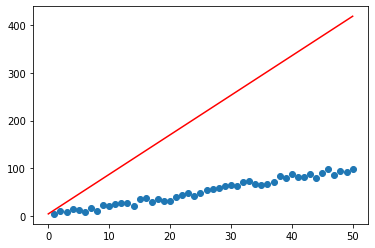

In [36]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')